In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import plotly.express as px
import scipy.stats as stats

# Exploratory Data Analysis

In [6]:
df_operating = pd.read_csv('fy25-adopted-operating-budget.csv')
# Detect encoding
with open('fy25-fy29-capital-budget-plan-adopted.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Read file with detected encoding
df_fy25capital = pd.read_csv('fy25-fy29-capital-budget-plan-adopted.csv', encoding=encoding)
print('Columns of fy25-adopted-operating-budget.csv')
print(df_operating.columns)
print()
print('Columns of fy25-fy29-capital-budget-plan-adopted.csv')
print(df_fy25capital.columns)
print(df_operating.head())
print()
print(df_fy25capital.head())


Columns of fy25-adopted-operating-budget.csv
Index(['Cabinet', 'Dept', 'Program', 'Expense Category', 'FY22 Actual Expense',
       'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'],
      dtype='object')

Columns of fy25-fy29-capital-budget-plan-adopted.csv
Index(['Department', 'Project_Name', 'Scope_Of_Work', 'PM_Department',
       'Project_Status', 'Neighborhood', 'Authorization_Existing',
       'Authorization_FY', 'Authorization_Future', ' Grant_Existing ',
       ' Grant_FY ', ' Grant_Future ', 'GO_Expended', 'Capital_Year_0',
       ' CapitalYear_1 ', 'Capital_Year_25', 'Grant_Expended', 'Grant_Year_0',
       ' Grant_Year_1 ', 'GrantYear_25', 'External_Funds',
       'Total_Project_Budget'],
      dtype='object')
           Cabinet            Dept                 Program  \
0  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
1  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
2  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
3  Mayor's

# Data Cleaning

In [7]:
empty=['#Missing']
print('Missing data by columns of csvs')
print(f'fy25-adopted-operating-budget={df_operating.apply(lambda col: col.isin(empty).sum())}')
print()
print(f'fy25-fy29-capital-budget-plan-adopted={df_fy25capital.apply(lambda col: col.isin(empty).sum())}')
print('Replacing Missing values')
df_operating.replace({'#Missing':0},inplace=True)
df_operating['FY22 Actual Expense'] = pd.to_numeric(df_operating['FY22 Actual Expense'], errors='coerce')
df_operating['FY23 Actual Expense'] = pd.to_numeric(df_operating['FY23 Actual Expense'], errors='coerce')
df_operating['FY24 Appropriation'] = pd.to_numeric(df_operating['FY24 Appropriation'], errors='coerce')
df_operating['FY25 Budget']=pd.to_numeric(df_operating['FY25 Budget'], errors='coerce')
import pandas as pd
import glob
import os

def standardize_column_names(df):
    """
    Standardize column names by removing special characters and converting to lowercase.
    """
    # Remove BOM character if present and convert to lowercase
    return df.rename(columns=lambda x: x.replace('ï»¿', '').strip().lower())

def merge_duplicate_columns(df, duplicate_cols):
    """
    Merge duplicate columns by taking the first non-null value across duplicates.
    """
    for col in duplicate_cols:
        # Find all columns that match the duplicate column name
        matching_cols = df.columns[df.columns == col]

        if len(matching_cols) > 1:
            # Combine columns by taking the first non-null value from left to right
            df[col] = df[list(matching_cols)].bfill(axis=1).iloc[:, 0]
            # Drop the duplicate columns, keeping only the first one
            df.drop(columns=list(matching_cols)[1:], inplace=True)
            print(f"Merged columns: {list(matching_cols)} into '{col}'")
    return df

def process_checkbook_files(data_directory):
    """
    Process and combine checkbook CSV files while handling column name inconsistencies.
    """
    # Define file pattern
    file_pattern = os.path.join(data_directory, 'checkbook-explorer-fy*.csv')
    csv_files = glob.glob(file_pattern)

    if not csv_files:
        raise FileNotFoundError(f"No CSV files found matching pattern: {file_pattern}")

    df_list = []

    # Read and standardize each CSV file
    for file in csv_files:
        try:
            # Read the CSV file with 'iso-8859-1' encoding
            temp_df = pd.read_csv(file, encoding='iso-8859-1')
            # Standardize column names immediately upon loading
            temp_df = standardize_column_names(temp_df)

            df_list.append(temp_df)
            print(f"Successfully loaded and standardized {file} with {temp_df.shape[0]} records.")
        except Exception as e:
            print(f"Error loading {file}: {e}")


Missing data by columns of csvs
fy25-adopted-operating-budget=Cabinet                  0
Dept                     0
Program                  0
Expense Category         0
FY22 Actual Expense    183
FY23 Actual Expense    138
FY24 Appropriation     129
FY25 Budget             94
dtype: int64

fy25-fy29-capital-budget-plan-adopted=Department                0
Project_Name              0
Scope_Of_Work             0
PM_Department             0
Project_Status            0
Neighborhood              0
Authorization_Existing    0
Authorization_FY          0
Authorization_Future      0
 Grant_Existing           0
 Grant_FY                 0
 Grant_Future             0
GO_Expended               0
Capital_Year_0            0
 CapitalYear_1            0
Capital_Year_25           0
Grant_Expended            0
Grant_Year_0              0
 Grant_Year_1             0
GrantYear_25              0
External_Funds            0
Total_Project_Budget      0
dtype: int64
Replacing Missing values


# Exploratory Data Analysis Of The Operating Expenses

3838631715.6590004
4059689437.5999994
4292164103.0999994
4636924670.2300005
Total Spending FY22: $3,838,631,715.66
Total Spending FY23: $4,059,689,437.60
Total Spending FY24: $4,292,164,103.10
Total Budget FY25: $4,636,924,670.23
Percentage Growth from FY22 to FY23: 5.76%
Percentage Growth from FY23 to FY24: 5.73%
Percentage Growth from FY24 to FY25: 8.03%
Average Growth Across All Programs: 6.51%

                      Program  Total Spending FY22-FY24
171                  Pensions              1.096199e+09
30                BPS Finance              8.462572e+08
31             BPS Operations              8.401213e+08
54     Charter School Tuition              7.626922e+08
33    Boston Fire Suppression              6.684350e+08
109          Health Insurance              6.404936e+08
44   Bureau of Field Services              6.290296e+08
69               Debt Service              6.288747e+08
125                       K-8              6.111756e+08
81                 Elementary         

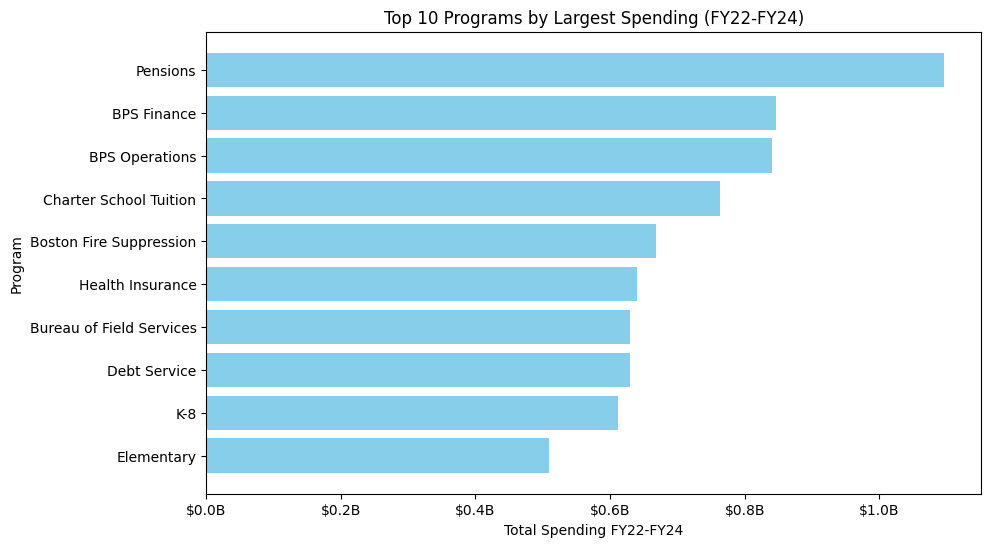

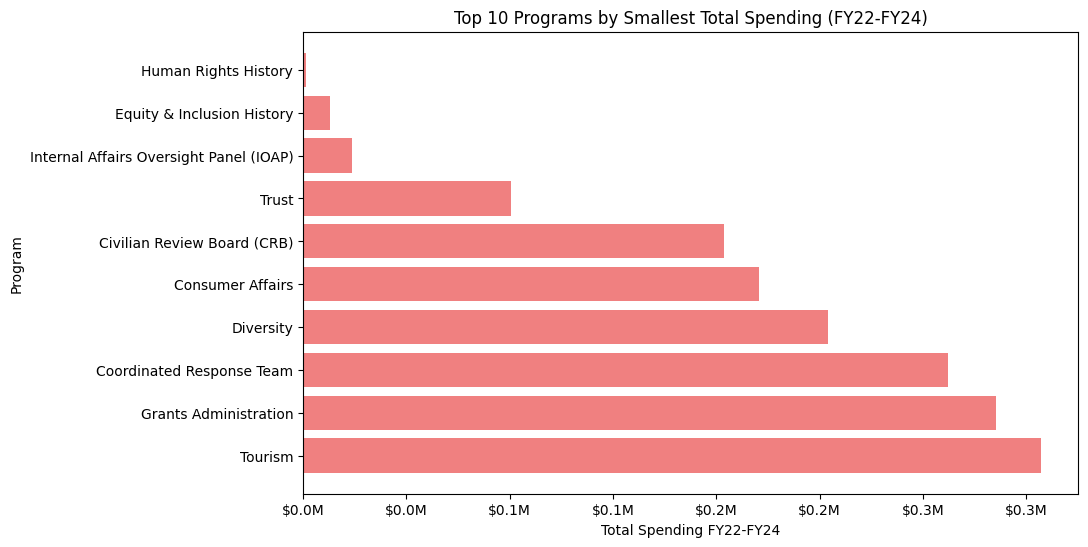

<ipython-input-8-2fa52c231db8>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_per_year_nonzero['Percentage Growth (FY22-FY24)'] = (


                                Program  Percentage Growth (FY22-FY24)
215                               Trust                     622.018468
189                  Revenue Monitoring                     556.029930
87                               Equity                     515.394046
143  Mayor's Office of Community Safety                     442.004707
10                   Affirmative Action                     361.924722
180              Program & Partnerships                     314.676535
216       Turnaround and Transformation                     261.507536
126                                 LCA                     185.687331
157          Office of Civic Organizing                     175.104317
194              Small & Local Business                     146.926060


<ipython-input-8-2fa52c231db8>:144: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

# Calculate total spending for each fiscal year
total_fy22 = df_operating['FY22 Actual Expense'].sum()
total_fy23 = df_operating['FY23 Actual Expense'].sum()
total_fy24 = df_operating['FY24 Appropriation'].sum()
total_budget_25 = df_operating['FY25 Budget'].sum()
print(total_fy22)
print(total_fy23)
print(total_fy24)
print(total_budget_25)
# Calculate percentage growth between fiscal years
growth_fy22_fy23 = ((total_fy23 - total_fy22) / total_fy22) * 100
growth_fy23_fy24 = ((total_fy24 - total_fy23) / total_fy23) * 100
growth_fy24_fy25 = ((total_budget_25 - total_fy24) / total_fy24) * 100

# Calculate average growth across fiscal years
average_growth = (growth_fy22_fy23 + growth_fy23_fy24 + growth_fy24_fy25) / 3

# Display results
print(f"Total Spending FY22: ${total_fy22:,.2f}")
print(f"Total Spending FY23: ${total_fy23:,.2f}")
print(f"Total Spending FY24: ${total_fy24:,.2f}")
print(f"Total Budget FY25: ${total_budget_25:,.2f}")
print(f"Percentage Growth from FY22 to FY23: {growth_fy22_fy23:.2f}%")
print(f"Percentage Growth from FY23 to FY24: {growth_fy23_fy24:.2f}%")
print(f"Percentage Growth from FY24 to FY25: {growth_fy24_fy25:.2f}%")
print(f"Average Growth Across All Programs: {average_growth:.2f}%\n")

# Calculate total spending per program for FY22-FY24
df_operating['Total Spending FY22-FY24'] = (
    df_operating['FY22 Actual Expense'] +
    df_operating['FY23 Actual Expense'] +
    df_operating['FY24 Appropriation']
)
total_spending_per_program = df_operating.groupby('Program')['Total Spending FY22-FY24'].sum().reset_index()

# Display top 10 programs by largest spending (FY22-FY24)
top_10_spenders = total_spending_per_program.nlargest(10, 'Total Spending FY22-FY24')
print(top_10_spenders)

# Plotting top 10 programs by spending
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'

plt.figure(figsize=(10, 6))
plt.barh(top_10_spenders['Program'], top_10_spenders['Total Spending FY22-FY24'], color='skyblue')
plt.xlabel('Total Spending FY22-FY24')
plt.ylabel('Program')
plt.title('Top 10 Programs by Largest Spending (FY22-FY24)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions))
plt.gca().invert_yaxis()
plt.show()

# Remove programs with zero total spending and find the 10 smallest spenders
total_spending_per_program = total_spending_per_program[total_spending_per_program['Total Spending FY22-FY24'] != 0]
smallest_10_spenders = total_spending_per_program.nsmallest(10, 'Total Spending FY22-FY24')

# Plotting smallest 10 programs by spending
def millions(x, pos):
    return f'${x * 1e-6:.1f}M'

plt.figure(figsize=(10, 6))
plt.barh(smallest_10_spenders['Program'], smallest_10_spenders['Total Spending FY22-FY24'], color='lightcoral')
plt.xlabel('Total Spending FY22-FY24')
plt.ylabel('Program')
plt.title('Top 10 Programs by Smallest Total Spending (FY22-FY24)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().invert_yaxis()
plt.show()

# Calculate and display programs with highest percentage growth from FY22 to FY24
spending_per_year = df_operating.groupby('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation']].sum().reset_index()
spending_per_year['Absolute Growth (FY22-FY24)'] = spending_per_year['FY24 Appropriation'] - spending_per_year['FY22 Actual Expense']
spending_per_year_nonzero = spending_per_year[spending_per_year['FY22 Actual Expense'] > 0]
spending_per_year_nonzero['Percentage Growth (FY22-FY24)'] = (
    (spending_per_year_nonzero['Absolute Growth (FY22-FY24)'] / spending_per_year_nonzero['FY22 Actual Expense']) * 100
)
most_growth_programs = spending_per_year_nonzero.nlargest(10, 'Percentage Growth (FY22-FY24)')
print(most_growth_programs[['Program', 'Percentage Growth (FY22-FY24)']])

# Plot programs with the highest growth
fig = px.bar(
    most_growth_programs,
    x='Program',
    y='Percentage Growth (FY22-FY24)',
    title='Top 10 Programs with Most Growth (FY22 to FY24)',
    labels={'Percentage Growth (FY22-FY24)': 'Percentage Growth (%)'},
)
fig.update_layout(xaxis_title="Program", yaxis_title="Percentage Growth (FY22-FY24)", width=800, height=500)
fig.show()

# Interactive scatter plot of spending per program
fig = px.scatter(
    total_spending_per_program,
    x='Program',
    y='Total Spending FY22-FY24',
    size='Total Spending FY22-FY24',  # Bubble size based on total spending
    hover_name='Program',
    hover_data={
        'Total Spending FY22-FY24': ':.2f',  # Display spending with two decimal places
    },
    labels={'Total Spending FY22-FY24': 'Total Spending (FY22-FY24)'},
    title='Interactive Scatter Plot of Spending per Program'
)

# Customize the scatter plot layout
fig.update_layout(
    xaxis_title="Program",
    yaxis_title="Total Spending FY22-FY24",
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    width=1200,
    height=600,
    title_font_size=20,
    plot_bgcolor='rgba(240, 240, 240, 1)',  # Lighter background color
)

fig.update_xaxes(showticklabels=False)
# Set y-axis to log scale with a minimum range
fig.update_yaxes(type="log", range=[5, 10], tickfont=dict(size=12))  # range=[5, 9] limits the y-axis log scale

# Adjust the bubble size range to avoid overly large bubbles
fig.update_traces(marker=dict(sizemode='area', sizeref=2.*max(total_spending_per_program['Total Spending FY22-FY24'])/(100.**2), sizemin=3))

# Show the interactive scatter plot
fig.show()

# Line plots of spending trends per department
df_spending = df_operating[['Dept', 'Program', 'FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']]
df_spending_long = df_spending.melt(
    id_vars=['Dept', 'Program'],
    value_vars=['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'],
    var_name='Fiscal Year',
    value_name='Spending'
)
df_aggregated = df_spending_long.groupby(['Dept', 'Program', 'Fiscal Year'], as_index=False).agg({'Spending': 'sum'})
df_aggregated['Spending'].replace(0, pd.NA, inplace=True)
df_aggregated.dropna(subset=['Spending'], inplace=True)


# Homelessness Correlation

# Using Mayor of Boston's Office of Housing


## Reading the CSV

In [9]:
df_families = pd.read_csv('Boston_Homeless_Census_Families_Combined.csv')
df_subpopulation = pd.read_csv('Boston_Homeless_Subpopulation_Combined.csv')
df_domestic_violence = pd.read_csv('Updated_Domestic_Violence_Combined_Census.csv')
df_individuals=pd.read_csv('Boston_Homeless_Census_Combined.csv')
df_rent_prices=pd.read_csv('Boston_Rent_2016_to_2024.csv')
df_housing_price_index=pd.read_csv('Housing_Price.csv')
print(df_rent_prices.columns)
print(df_rent_prices.head)

Index(['Year', 'Average Rent (USD)'], dtype='object')
<bound method NDFrame.head of    Year  Average Rent (USD)
0  2016                2700
1  2017                2800
2  2018                2900
3  2019                3000
4  2020                3100
5  2021                3200
6  2022                3300
7  2023                3400
8  2024                3500>


## Seeing The Trends In Homelessness

### Individuals

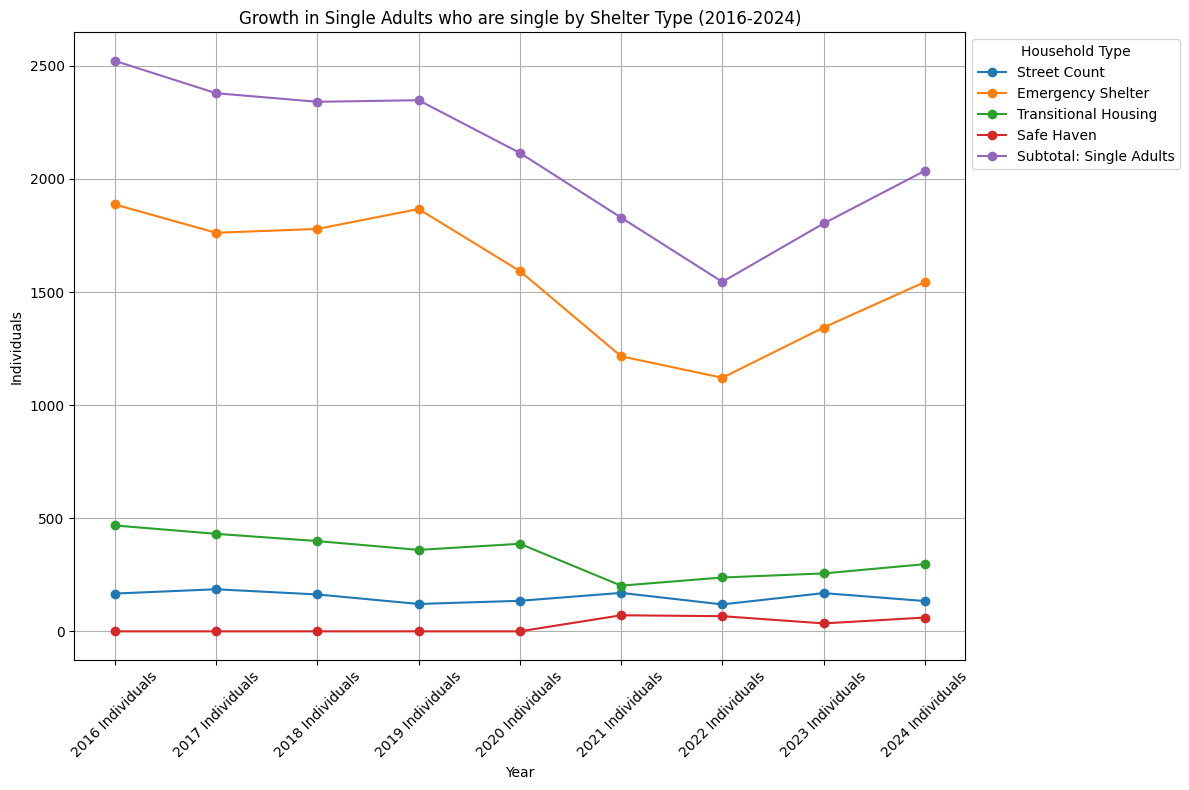

In [10]:
# Transpose the DataFrame
df_growth_transposed = df_individuals.transpose()

# Reset index to make the original index a column
df_growth_transposed.reset_index(inplace=True)

# Assign the first row as the column headers
df_growth_transposed.columns = df_growth_transposed.iloc[0]

# Drop the row that was used as column headers
df_growth_transposed = df_growth_transposed.iloc[1:]

# Set the 'Household Type' as the index
df_growth_transposed.set_index('Household Type', inplace=True)

# Fixing the value for "2021 Individuals"
df_growth_transposed.loc["2021 Individuals", "Subtotal: Single Adults"] = 1829

# Reverse the row order
df_growth_transposed = df_growth_transposed.iloc[::-1]

# Plotting the growth
plt.figure(figsize=(12, 8))
for household_type in df_growth_transposed.columns:
    plt.plot(df_growth_transposed.index, df_growth_transposed[household_type], marker='o', label=household_type)

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.title("Growth in Single Adults who are single by Shelter Type (2016-2024)")
plt.xticks(rotation=45)
plt.legend(title="Household Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

### Individuals in Families and Families

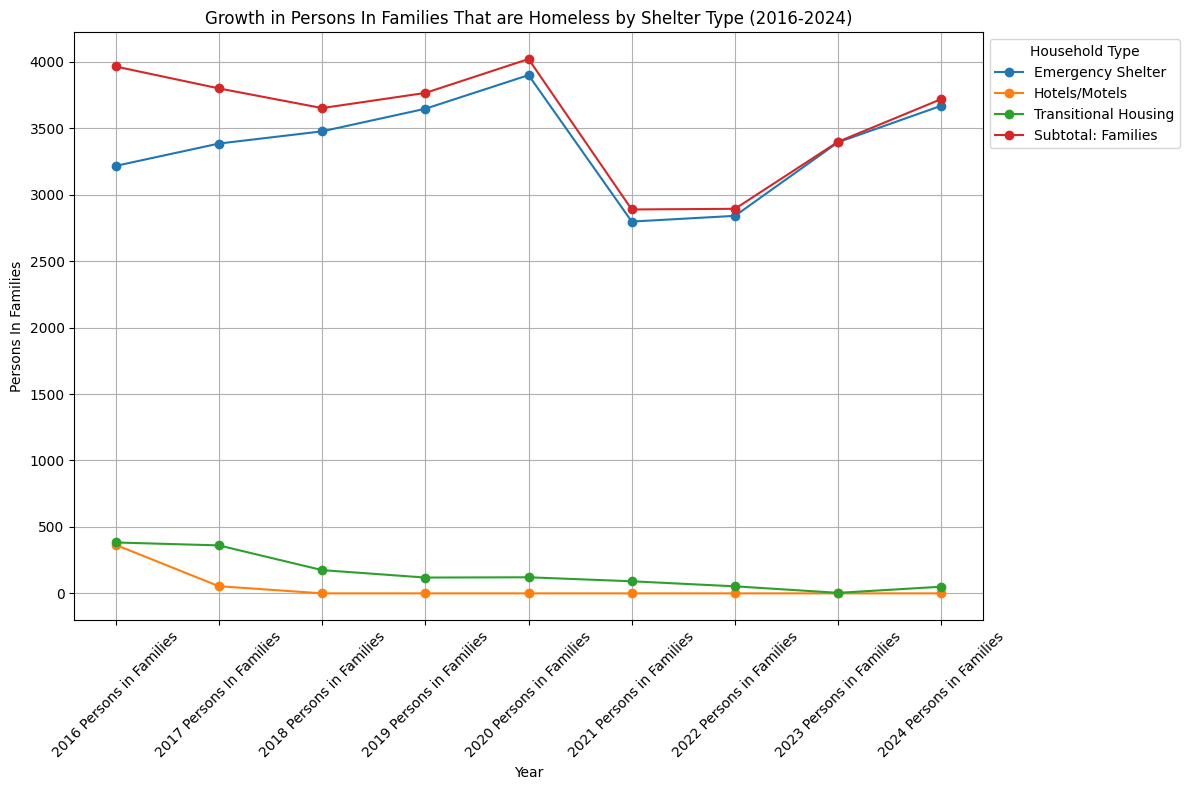

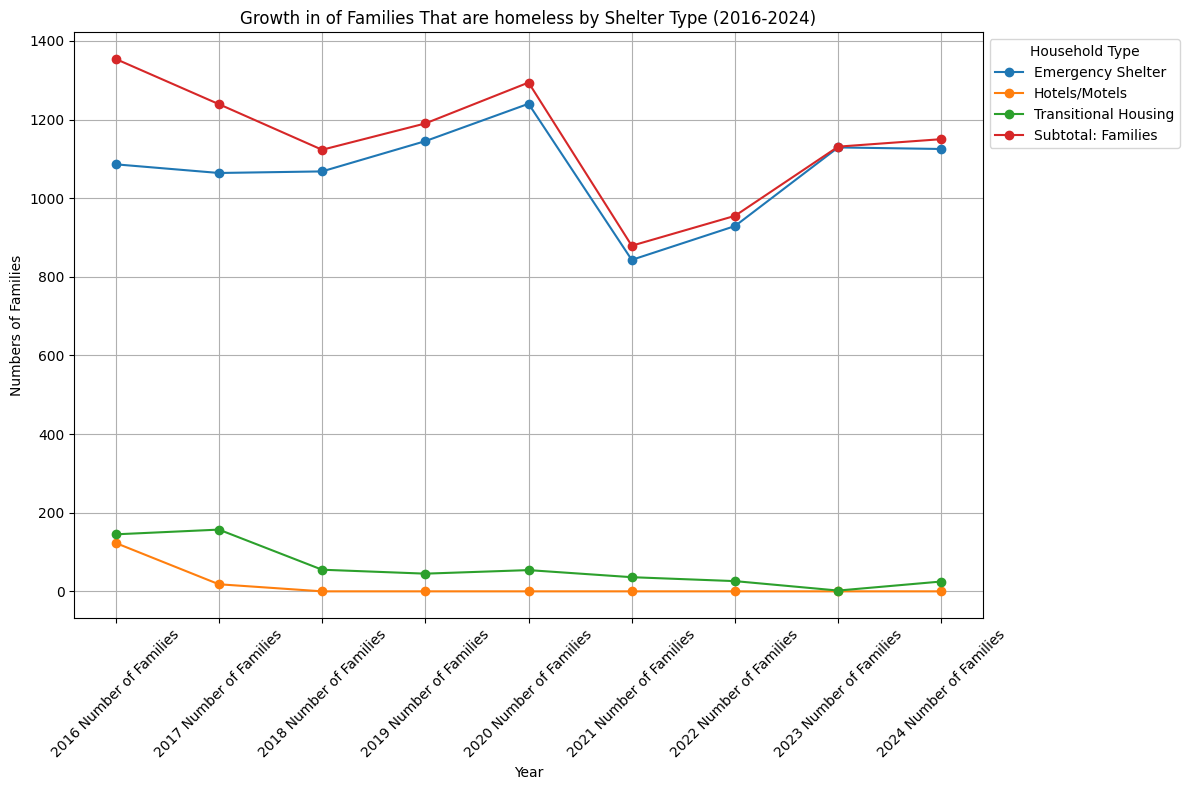

In [11]:
# Identify columns that belong to "Persons" and "Families"
persons_columns = [col for col in df_families.columns if "Persons" in col]
families_columns = [col for col in df_families.columns if "Number" in col]

# Create new DataFrames for each group
df_persons = df_families[['Household Type']+persons_columns]
df_families = df_families[['Household Type']+families_columns]

df_persons_transposed=df_persons.transpose()

# Reset index to make the original index a column
df_persons_transposed.reset_index(inplace=True)

# Assign the first row as the column headers
df_persons_transposed.columns = df_persons_transposed.iloc[0]

# Drop the row that was used as column headers
df_persons_transposed = df_persons_transposed.iloc[1:]

# Set the 'Household Type' as the index
df_persons_transposed.set_index('Household Type', inplace=True)

# Plotting the growth
plt.figure(figsize=(12, 8))
for household_type in df_persons_transposed.columns:
    plt.plot(df_persons_transposed.index, df_persons_transposed[household_type], marker='o', label=household_type)

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Persons In Families")
plt.title("Growth in Persons In Families That are Homeless by Shelter Type (2016-2024)")
plt.xticks(rotation=45)
plt.legend(title="Household Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# Transpose df_persons
df_families_transposed=df_families.transpose()

# Reset index to make the original index a column
df_families_transposed.reset_index(inplace=True)

# Assign the first row as the column headers
df_families_transposed.columns = df_families_transposed.iloc[0]

# Drop the row that was used as column headers
df_families_transposed = df_families_transposed.iloc[1:]

# Set the 'Household Type' as the index
df_families_transposed.set_index('Household Type', inplace=True)

# Plotting the growth
plt.figure(figsize=(12, 8))
for household_type in df_families_transposed.columns:
    plt.plot(df_families_transposed.index, df_families_transposed[household_type], marker='o', label=household_type)

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Numbers of Families")
plt.title("Growth in of Families That are homeless by Shelter Type (2016-2024)")
plt.xticks(rotation=45)
plt.legend(title="Household Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

## Finding Average Size of Homelessness

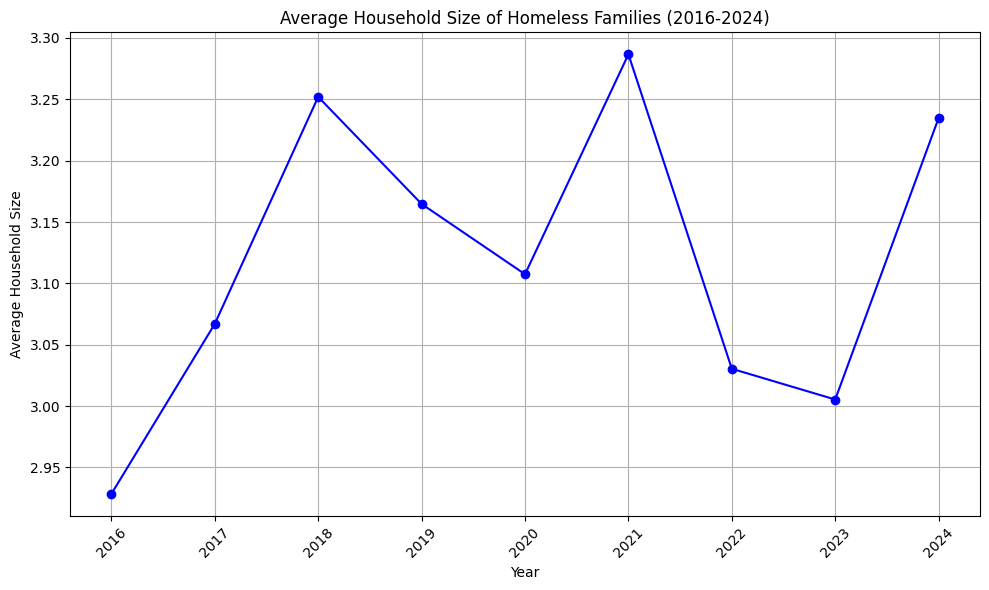

In [12]:
# Convert data to numeric (in case some are strings)
df_family_subtotal = df_families_transposed['Subtotal: Families']
df_person_subtotal = df_persons_transposed['Subtotal: Families']
year=2016
index= 0
average_household_size_homeless=pd.Series()
while(year<2025):
    average_household_size_homeless[f"{year}"]=df_person_subtotal.iloc[index]/df_family_subtotal.iloc[index]
    index+=1
    year+=1
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(average_household_size_homeless.index, average_household_size_homeless.values, marker='o', linestyle='-', color='b')

# Adding labels, title, and grid
plt.xlabel("Year")
plt.ylabel("Average Household Size")
plt.title("Average Household Size of Homeless Families (2016-2024)")
plt.xticks(average_household_size_homeless.index, rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Domestic Violence & The number of persons & families that are homeless

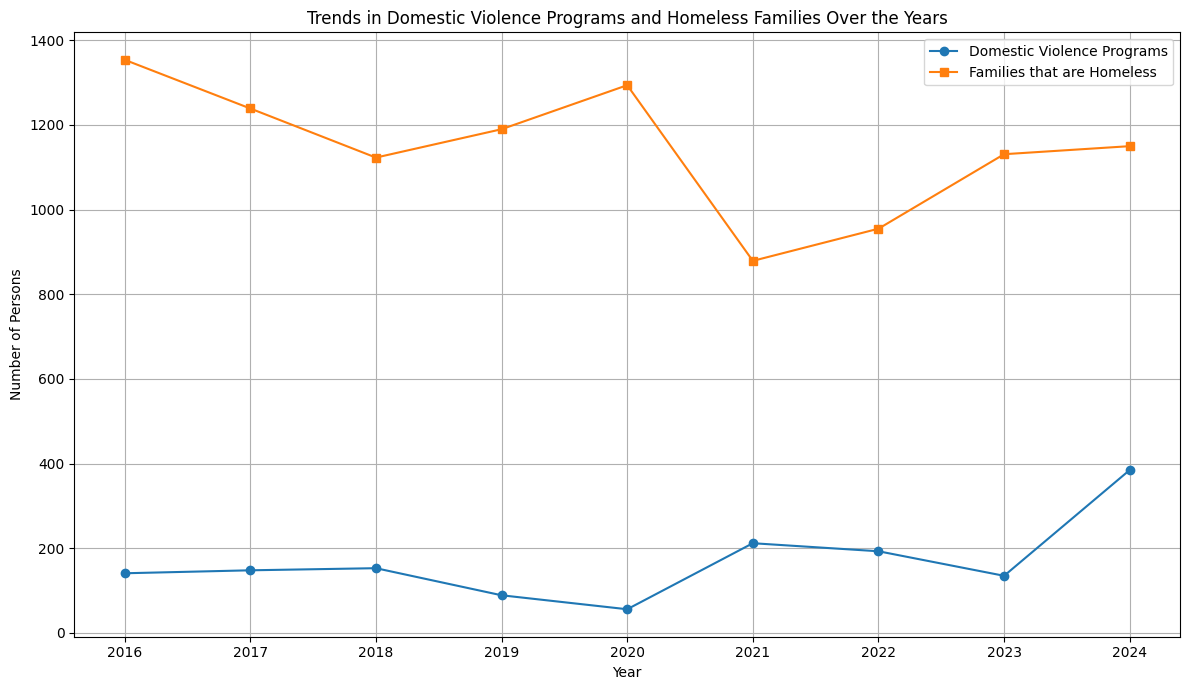

In [19]:
df_subpopulation_transposed = df_subpopulation.transpose()
# Reset index to make the original index a column
df_subpopulation_transposed.reset_index(inplace=True)
# Assign the first row as the column headers
df_subpopulation_transposed.columns = df_subpopulation_transposed.iloc[0]
# Drop the row that was used as column headers
df_subpopulation_transposed = df_subpopulation_transposed.iloc[1:]
df_subpopulation_transposed.set_index('Subpopulation Type', inplace=True)
df_sub_dv=df_subpopulation_transposed['Persons in domestic violence (DV) programs']

domestic_violence_individuals = [col for col in df_domestic_violence.columns if 'Persons' in col]
df_domestic_violence_individuals =df_domestic_violence[['Program Type']+domestic_violence_individuals]

df_domestic_violence_transposed = df_domestic_violence_individuals.transpose()
# Reset index to make the original index a column
df_domestic_violence_transposed.reset_index(inplace=True)
# Assign the first row as the column headers
df_domestic_violence_transposed.columns = df_domestic_violence_transposed.iloc[0]
# Drop the row that was used as column headers
df_domestic_violence_transposed = df_domestic_violence_transposed.iloc[1:]
df_domestic_violence_transposed_subtotal = df_domestic_violence_transposed[['Program Type','Subtotal: Domestic Violence']]

combined = pd.Series()
year= 2021
index = 0
while year !=2025:
    combined[year]=df_sub_dv.iloc[index]
    index+=1
    year+=1
year=2016
index=0
while year!=2021:
    combined[year] = df_domestic_violence_transposed_subtotal.iloc[index,1]
    year+=1
    index+=1
combined.sort_index(inplace=True)
df_families_subtotal = df_families_transposed['Subtotal: Families']
total_families=[]
for x in df_families_transposed.values:
    total_families.append(x[-1])
total_families = np.array(total_families)

data = {"Years":combined.index,"domestic_violence":combined.values, 'Homeless Families': total_families}
combined_df= pd.DataFrame(data)

# Plot the trends
plt.figure(figsize=(12, 7))
plt.plot(combined_df['Years'], combined_df['domestic_violence'], marker='o', label='Domestic Violence Programs')
plt.plot(combined_df['Years'], combined_df['Homeless Families'], marker='s', label='Families that are Homeless')

# Customize the plot
plt.title('Trends in Domestic Violence Programs and Homeless Families Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Persons')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

## Total Homelessness

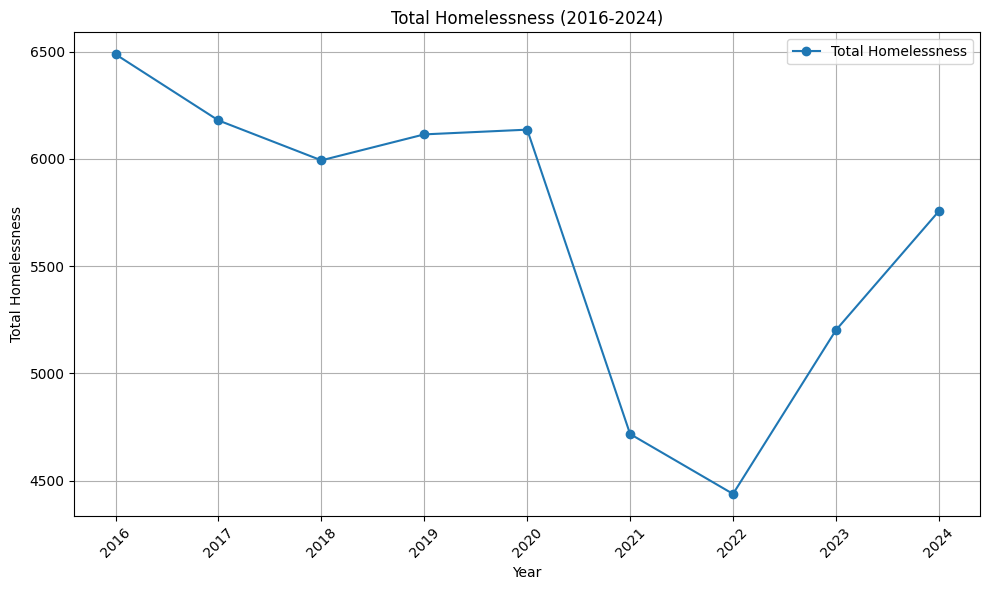

[6487.0, 6179.0, 5993.0, 6114.0, 6136.0, 4718, 4439.0, 5202.0, 5756.0]


In [13]:
combined =[]
for x in range(9):
    # Correctly access the elements with .iloc[row, column]
    value = df_persons_transposed.iloc[x, 3] + df_growth_transposed.iloc[x, 4]
    combined.append(value)
df_total_homelessness = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021,2022,2023,2024],'Total':combined})
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_total_homelessness['Year'], df_total_homelessness['Total'], marker='o', label='Total Homelessness')

# Adding labels, title, and grid
plt.xlabel('Year')
plt.ylabel('Total Homelessness')
plt.title('Total Homelessness (2016-2024)')
plt.xticks(df_total_homelessness['Year'], rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
print(combined)

### Housing budget in boston and the number of homeless individuals in Boston

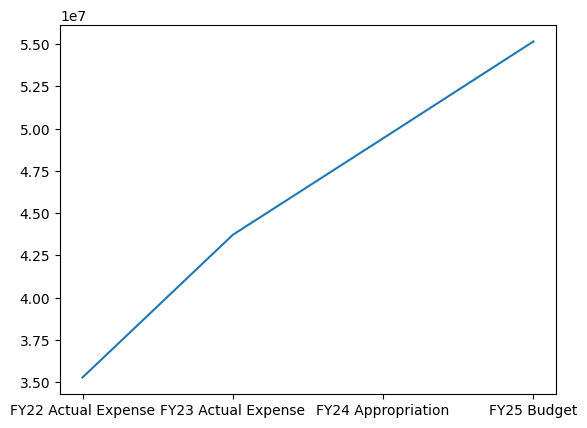

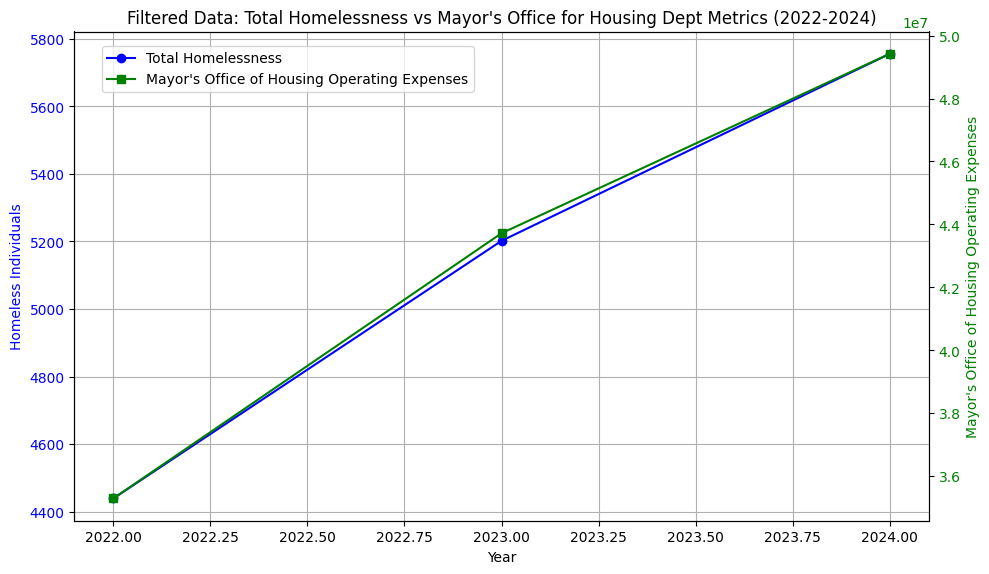

Correlation coefficient: 0.999809413589104
P-value: 0.012429337602269917


In [14]:
# Filter for the specific department
department_name = "Mayor's Office of Housing"
df_department_filtered = df_aggregated[df_aggregated['Dept'] == department_name]
df_department_filtered_list = df_department_filtered.groupby(by='Fiscal Year').aggregate('sum').Spending.tolist()[:-1]
combined =[]
for x in range(9):
    # Correctly access the elements with .iloc[row, column]
    value = df_persons_transposed.iloc[x, 3] + df_growth_transposed.iloc[x, 4]
    combined.append(value)

df_combined_filtered= pd.DataFrame({'Year':[2022,2023,2024],'Homeless_Individuals':combined[-3:],'Operating_Expenses': df_department_filtered_list})
plt.plot(df_department_filtered.groupby(by='Fiscal Year').aggregate('sum').Spending)
plt.show
# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Homelessness on the first y-axis
ax1.plot(df_combined_filtered['Year'], df_combined_filtered['Homeless_Individuals'], marker='o', color='blue', label='Total Homelessness')
ax1.set_xlabel('Year')
ax1.set_ylabel('Homeless Individuals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Filtered Data: Total Homelessness vs Mayor's Office for Housing Dept Metrics (2022-2024)")
ax1.grid(True)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_combined_filtered['Year'], df_combined_filtered['Operating_Expenses'], marker='s', color='green', label="Mayor's Office of Housing Operating Expenses")
ax2.set_ylabel("Mayor's Office of Housing Operating Expenses", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends for both y-axes
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

correlation_coefficient, p_value = stats.pearsonr(df_combined_filtered['Homeless_Individuals'], df_combined_filtered['Operating_Expenses'])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)


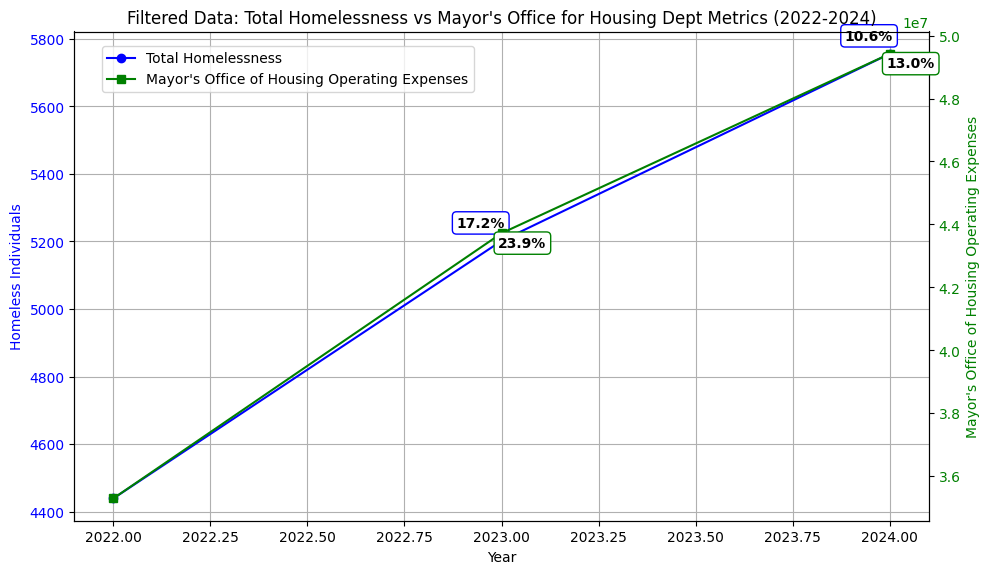

In [15]:
# Calculate percentage growth for Homeless Individuals and Operating Expenses
df_combined_filtered['Homeless_Growth_%'] = df_combined_filtered['Homeless_Individuals'].pct_change() * 100
df_combined_filtered['Operating_Expenses_Growth_%'] = df_combined_filtered['Operating_Expenses'].pct_change() * 100

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Homelessness on the first y-axis
ax1.plot(df_combined_filtered['Year'], df_combined_filtered['Homeless_Individuals'], marker='o', color='blue', label='Total Homelessness')
ax1.set_xlabel('Year')
ax1.set_ylabel('Homeless Individuals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Filtered Data: Total Homelessness vs Mayor's Office for Housing Dept Metrics (2022-2024)")
ax1.grid(True)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_combined_filtered['Year'], df_combined_filtered['Operating_Expenses'], marker='s', color='green', label="Mayor's Office of Housing Operating Expenses")
ax2.set_ylabel("Mayor's Office of Housing Operating Expenses", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends for both y-axes
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Annotate percentage growth on the first axis
# Annotate percentage growth on the first axis with improved style
for i, row in df_combined_filtered.iterrows():
    if not pd.isna(row['Homeless_Growth_%']):  # Avoid NaN values
        ax1.annotate(
            f"{row['Homeless_Growth_%']:.1f}%",
            (row['Year'], row['Homeless_Individuals']),
            textcoords="offset points",
            xytext=(-15, 10),
            ha='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white')
        )

    if not pd.isna(row['Operating_Expenses_Growth_%']):  # Avoid NaN values
        ax2.annotate(
            f"{row['Operating_Expenses_Growth_%']:.1f}%",
            (row['Year'], row['Operating_Expenses']),
            textcoords="offset points",
            xytext=(15, -10),
            ha='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white')
        )


plt.tight_layout()
plt.show()

### Total Homelessness vs All Transactions housing price

<ipython-input-16-b7602138e404>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



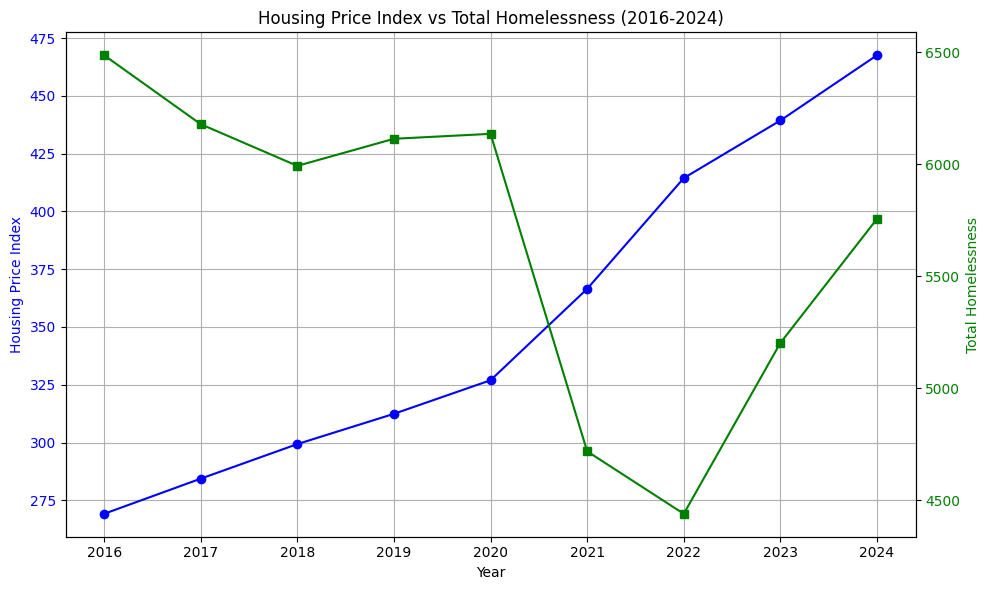

Correlation coefficient: -0.6550539119685094
P-value: 0.05550066761257748


In [16]:
# Convert the 'DATE' column to datetime format for filtering
df_housing_price_index['DATE'] = pd.to_datetime(df_housing_price_index['DATE'])

# Filter the data for the date range 2016-01-01 to 2024-12-31
filtered_data = df_housing_price_index[(df_housing_price_index['DATE'] >= '2016-01-01') & (df_housing_price_index['DATE'] <= '2024-12-31')]

# Convert to a pandas Series, using the 'DATE' as the index
series_2016_2024 = pd.Series(filtered_data['ATNHPIUS14454Q'].values, index=filtered_data['DATE'])

# Display the first few rows of the Series
# Extract the year from the 'DATE' index
filtered_data['Year'] = filtered_data['DATE'].dt.year

# Group by 'Year' and calculate the average price
yearly_average = filtered_data.groupby('Year')['ATNHPIUS14454Q'].mean()
df_total_homelessness_housing_index = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021,2022,2023,2024],
                                                    'Housing_Price_Index':yearly_average.values,
                                                    'Total_Homelessness': df_total_homelessness['Total']})
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Housing Price Index on the first y-axis
ax1.plot(df_total_homelessness_housing_index['Year'],
         df_total_homelessness_housing_index['Housing_Price_Index'],
         label='Housing Price Index', marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Housing Price Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_total_homelessness_housing_index['Year'],
         df_total_homelessness_housing_index['Total_Homelessness'],
         label='Total Homelessness', marker='s', color='green')
ax2.set_ylabel('Total Homelessness', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title
plt.title('Housing Price Index vs Total Homelessness (2016-2024)')

# Add a grid for better readability
ax1.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


correlation_coefficient, p_value = stats.pearsonr(df_total_homelessness_housing_index['Housing_Price_Index'], df_total_homelessness_housing_index['Total_Homelessness'])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

### Total Homelessness vs Growth of Housing Price index

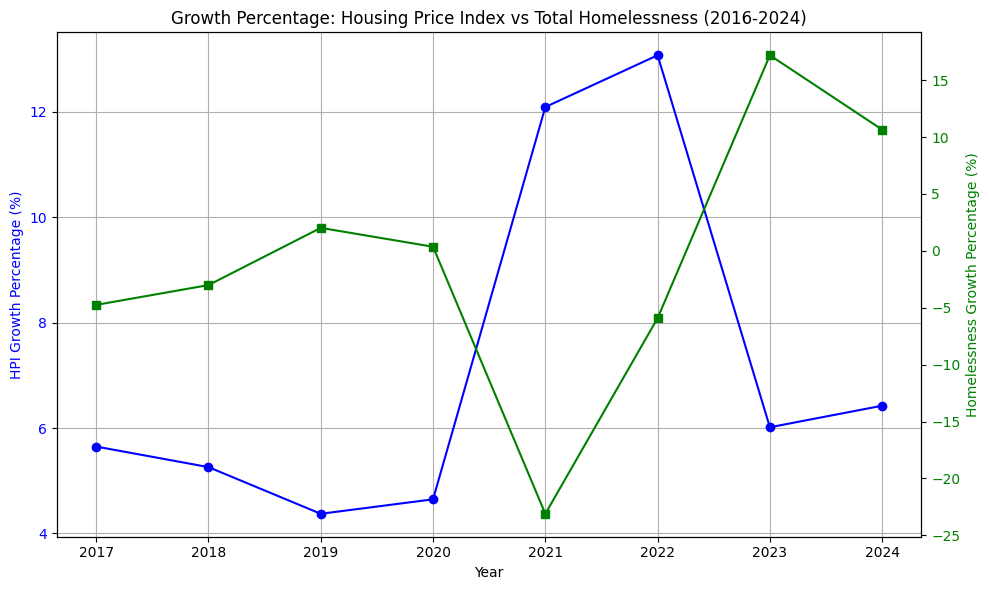

-24.265123240678072


In [17]:
# Calculate growth percentage for Housing Price Index and Total Homelessness
df_total_homelessness_housing_index['HPI_Growth_Percentage'] = df_total_homelessness_housing_index['Housing_Price_Index'].pct_change() * 100
df_total_homelessness_housing_index['Homelessness_Growth_Percentage'] = df_total_homelessness_housing_index['Total_Homelessness'].pct_change() * 100

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Housing Price Index Growth Percentage on the first y-axis
ax1.plot(df_total_homelessness_housing_index['Year'],
         df_total_homelessness_housing_index['HPI_Growth_Percentage'],
         label='HPI Growth Percentage', marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('HPI Growth Percentage (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_total_homelessness_housing_index['Year'],
         df_total_homelessness_housing_index['Homelessness_Growth_Percentage'],
         label='Homelessness Growth Percentage', marker='s', color='green')
ax2.set_ylabel('Homelessness Growth Percentage (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title
plt.title('Growth Percentage: Housing Price Index vs Total Homelessness (2016-2024)')

# Add a grid for better readability
ax1.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


df_total_homelessness_housing_index.dropna(inplace=True)

cov = np.cov(df_total_homelessness_housing_index['HPI_Growth_Percentage'], df_total_homelessness_housing_index['Homelessness_Growth_Percentage'])

print(cov[0][1])

### Total Homelessness vs Average Rent Size

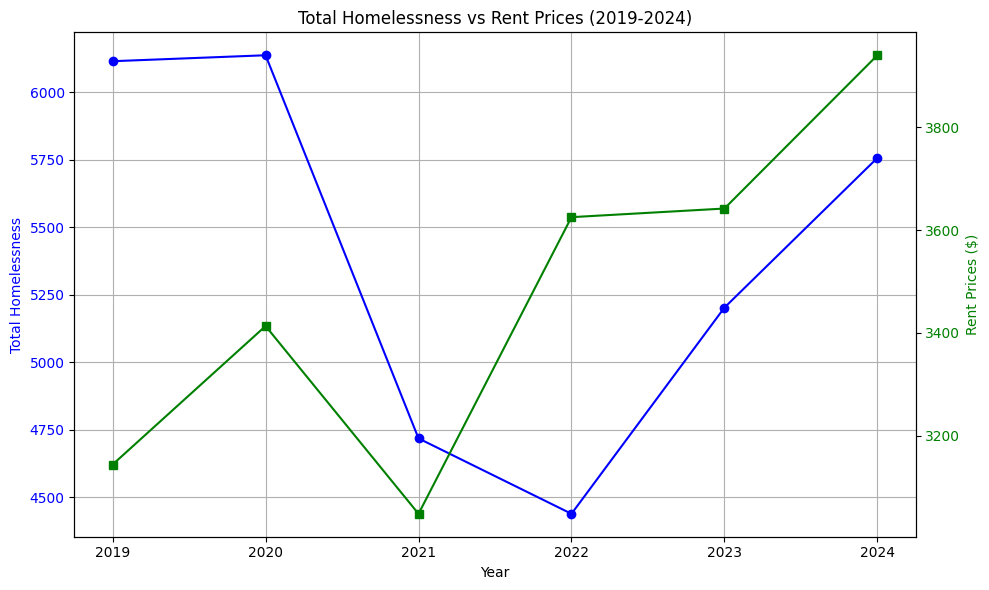

[ 5.21174567e+05 -5.11766667e+02] [  -511.76666667 112107.84166667]


In [18]:
combined =[]
for x in range(9):
    # Correctly access the elements with .iloc[row, column]
    value = df_persons_transposed.iloc[x, 3] + df_growth_transposed.iloc[x, 4]
    combined.append(value)
df_total_homelessness = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021,2022,2023,2024],'Total':combined})
df_homelessness=pd.DataFrame({'Year':[2019,2020,2021,2022,2023,2024],'Total Homelessness':combined[-6:],'Rent Prices':[3144.50,3413.50,3048.75,3625,3641.75,3939.50]})
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Homelessness on the first y-axis
ax1.plot(df_homelessness['Year'],
         df_homelessness['Total Homelessness'],
         label='Total Homelessness', marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Homelessness', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_homelessness['Year'],
         df_homelessness['Rent Prices'],
         label='Rent Prices', marker='s', color='green')
ax2.set_ylabel('Rent Prices ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title
plt.title('Total Homelessness vs Rent Prices (2019-2024)')

# Add a grid for better readability
ax1.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

cov = np.cov(df_homelessness['Total Homelessness'], df_homelessness['Rent Prices'])

print(*cov)

# Using the Data of Department of Fair Housing & Equity

In [22]:
housing_data = df_operating[df_operating['Dept'] == "Fair Housing & Equity"]
words = ["housing", "homelessness", "shelter", "home", "housing", "homeless"]
operating_budget_housing = housing_data[housing_data['Program'].str.contains('|'.join(words), case=False, na=False)]
capital_budget_housing = df_fy25capital[df_fy25capital['Project_Name'].str.contains('|'.join(words), case=False, na=False)]

## Fair Housing & Equity Budget

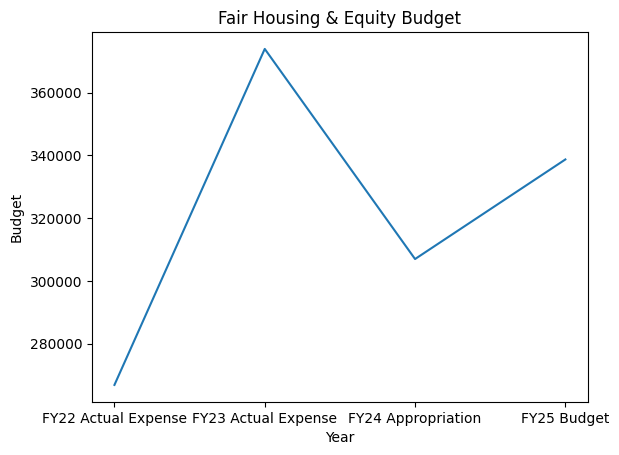

In [21]:
years = [
    "FY22 Actual Expense",
    "FY23 Actual Expense",
    "FY24 Appropriation",
    "FY25 Budget"
]

plt.plot(years, housing_data[years].values[0])
plt.xlabel('Year')
plt.ylabel('Budget')
plt.title('Fair Housing & Equity Budget')
plt.show()

# Filter Rows Related to Homelessness


In [25]:
homelessness_keywords = ["homeless", "shelter", "housing"]
# Filter rows related to homelessness
operating_relevant = operating_budget_housing[
    operating_budget_housing.apply(lambda row: any(keyword in str(row).lower() for keyword in homelessness_keywords), axis=1)
]
capital_relevant = capital_budget_housing[
    capital_budget_housing.apply(lambda row: any(keyword in str(row).lower() for keyword in homelessness_keywords), axis=1)
]

print(capital_relevant.head())

                          Department  \
79         Mayor's Office of Housing   
85   Parks and Recreation Department   
178   Property Management Department   
265          Public Works Department   

                                     Project_Name  \
79                       BHA Housing Improvements   
85                                 Animal Shelter   
178          Animal Shelter HVAC - 26 Mahler Road   
265  Whittier Street Housing Development Roadways   

                                         Scope_Of_Work  \
79   Upgrade elderly/disabled public housing units ...   
85   Develop a building program and assess siting o...   
178  Design and implement HVAC and building repairs...   
265  Reconstruct roads and sidewalks in the Whittie...   

                    PM_Department  Project_Status Neighborhood  \
79       Boston Housing Authority  Annual Program     Citywide   
85   Public Facilities Department       In Design      Roxbury   
178  Public Facilities Department       In D

# Fair Housing Comission Spending by Category

<ipython-input-26-b8ac8de2cb77>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



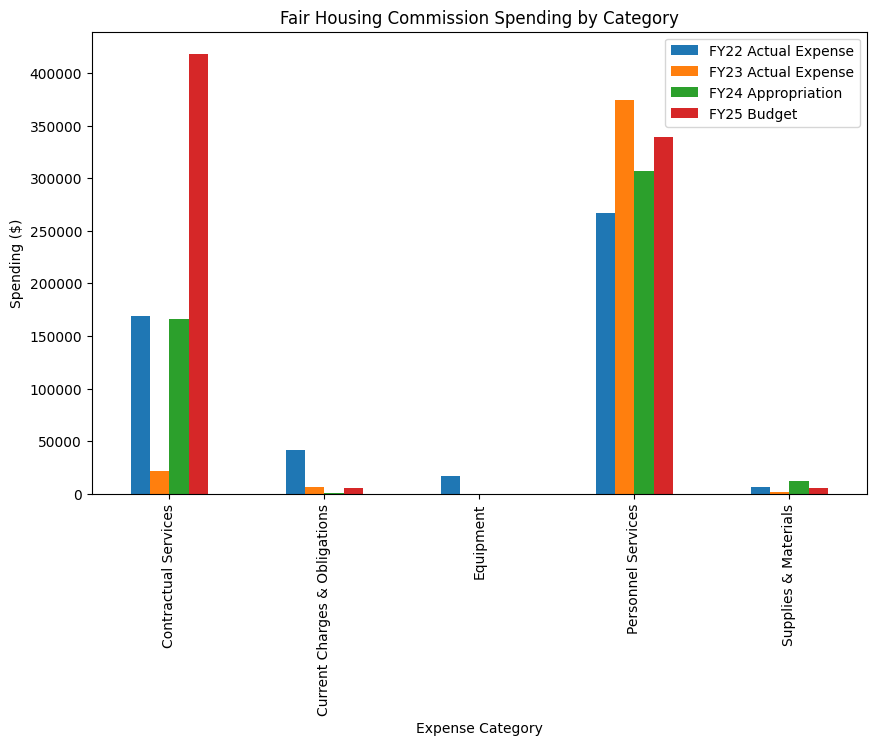

In [26]:
operating_budget_housing = pd.read_csv("fy25-adopted-operating-budget.csv")
fair_housing_data = operating_budget_housing[
    operating_budget_housing["Program"].str.contains("Fair Housing", case=False, na=False)
]

for col in ["FY22 Actual Expense", "FY23 Actual Expense", "FY24 Appropriation", "FY25 Budget"]:
    fair_housing_data[col] = pd.to_numeric(fair_housing_data[col], errors='coerce')

spending_by_category = fair_housing_data.groupby("Expense Category")[
    ["FY22 Actual Expense", "FY23 Actual Expense", "FY24 Appropriation", "FY25 Budget"]
].sum()

spending_by_category.plot(kind="bar", figsize=(10, 6))
plt.title("Fair Housing Commission Spending by Category")
plt.ylabel("Spending ($)")
plt.xlabel("Expense Category")
plt.show()

## Fair Housing Commision Total Spending Over the Year

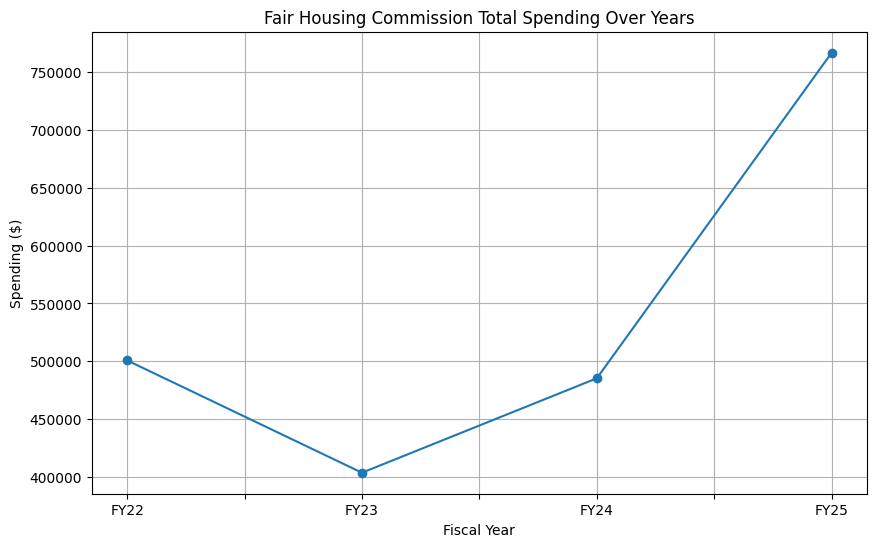

In [27]:
total_spending_by_year = fair_housing_data[
    ["FY22 Actual Expense", "FY23 Actual Expense", "FY24 Appropriation", "FY25 Budget"]
].sum()

total_spending_by_year.index = ["FY22", "FY23", "FY24", "FY25"]

total_spending_by_year.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Fair Housing Commission Total Spending Over Years")
plt.ylabel("Spending ($)")
plt.xlabel("Fiscal Year")
plt.grid()
plt.show()
